In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from sklearn.feature_extraction.text import CountVectorizer

Willkommen zum fünften Python-Problem Set in diesem Modul!  
Sie finden hier zwei Aufgaben (*Exercise 9* und *Exercise 10*) zu Inhalten aus Kapitel 4 *Text Mining* - konkret zu den Teilen 4.1 *Einführung und Grundlagen* und 4.2 *Topic Analysis und Topic Mining*.

# Exercise 9 -- Einführung und Grundlagen in Text Mining

Das Ziel dieser *Exercise* ist die Heranführung an die grundlegenden Schritte des Text Mining. Hierzu gehört zunächst das **Einlesen von Textdaten** und die **Konvertierung der Textdaten** in maschinenlesbare Form, in unserem Fall als Document Term Matrix (DTM).  

Die DTM eines Dokumentencorpus beinhaltet in den Zeilen die entsprechenden Dokumente des Corpus, während die Spalten alle verschiedenen Wörter des gesamten Corpus darstellen. Die Einträge der DTM beschreiben dabei das Vorkommen eines Wortes innerhalb eines Dokumentes. Informationen zum *i*-ten Dokument des Corpus erhalten wir daher in der *i*-ten Zeile der DTM. Sie entspricht dem im Skript eingeführten **Dokumentvektor** des Vektorraummodells. In der folgenden *Infobox* finden Sie eine kurze Wiederholung zu Dokumentvektoren. 

## Import

In [2]:
# {"9_1"}

#Separates Einlesen der Datensätze für positiv und negativ bewertete Filme
pos_movie_dir = 'pos'
neg_movie_dir = 'neg'
#Funktion zum Einlesen der Textdateien
def read_txt_in_dir(directory):
    dir_txt = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename)) as file:
            txt = file.read()
            dir_txt.append(txt)
    return dir_txt
#Speichern der Daten in einer Liste
pos_movies = read_txt_in_dir(pos_movie_dir)
neg_movies = read_txt_in_dir(neg_movie_dir)
#Alle Daten in einer Tabelle zusammenfassen
all_movies = pd.DataFrame({'pos_movies': pos_movies, 'neg_movies': neg_movies})

#Ausgabe des dritten Elements der Datensätze
print(pos_movies[2])
print("-----------------")
print(neg_movies[2])

you've got mail works alot better than it deserves to . 
in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . 
no real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . 
essentially , it goes against and defies all concepts of good contemporary filmmaking . 
it's overly sentimental and at times terribly mushy , not to mention very manipulative . 
but oh , how enjoyable that manipulation is . 
but there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . 
it couldn't have been the directing , because both films were helmed by the same woman . 
i haven't quite yet figured out what i like

## Preprocessing

### Kleinschreibung

In [3]:
# Konvertierung des Textes in Kleinbuchstaben
all_movies_lowercase = all_movies.applymap(str.lower)
# Anzeigen der ersten 5 Zeilen
all_movies_lowercase[0:5]

,pos_movies,neg_movies
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,..."
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs..."
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...


### Zeichensetzung

In [4]:
# Import der notwendigen library
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Funktion zum Entfernen der Zeichensetzung
def remove_punctuation(doc):
    return "".join([char for char in doc if char not in string.punctuation])

In [6]:
all_movies_removed_punctuation = all_movies_lowercase.applymap(remove_punctuation)
# Anzeigen der ersten 5 Zeilen
all_movies_removed_punctuation[0:5]

,pos_movies,neg_movies
0,films adapted from comic books have had plenty...,plot two teen couples go to a church party d...
1,every now and then a movie comes along from a ...,the happy bastards quick movie review \ndamn t...
2,youve got mail works alot better than it deser...,it is movies like these that make a jaded movi...
3,jaws is a rare film that grabs your attenti...,quest for camelot is warner bros first fe...
4,moviemaking is a lot like being the general ma...,synopsis a mentally unstable man undergoing p...


### Tokenization

In [7]:
from nltk import word_tokenize

In [8]:
# Tokenizing der Wörter
all_movies_tokenized = all_movies_removed_punctuation.applymap(word_tokenize)
# Anzeigen der ersten 5 Zeilen
all_movies_tokenized[:5]

,pos_movies,neg_movies
0,"[films, adapted, from, comic, books, have, had...","[plot, two, teen, couples, go, to, a, church, ..."
1,"[every, now, and, then, a, movie, comes, along...","[the, happy, bastards, quick, movie, review, d..."
2,"[youve, got, mail, works, alot, better, than, ...","[it, is, movies, like, these, that, make, a, j..."
3,"[jaws, is, a, rare, film, that, grabs, your, a...","[quest, for, camelot, is, warner, bros, first,..."
4,"[moviemaking, is, a, lot, like, being, the, ge...","[synopsis, a, mentally, unstable, man, undergo..."


### Stoppwörter

In [9]:
from nltk.corpus import stopwords

In [10]:
# Import der Stoppwörter
stop_words = stopwords.words('english')
print(stop_words[0:5])

['i', 'me', 'my', 'myself', 'we']


In [11]:
# Funktion zum Entfernen von Stoppwörtern
def remove_stopwords(tokens):
    words_without_stopwords = [word for word in tokens if word not in stop_words]

    return words_without_stopwords

In [12]:
# Entfernen der Stoppwörter
all_movies_removed_stopwords = all_movies_tokenized.applymap(remove_stopwords)
# Anzeigen der ersten 5 Zeilen
all_movies_removed_stopwords[0:5]

,pos_movies,neg_movies
0,"[films, adapted, comic, books, plenty, success...","[plot, two, teen, couples, go, church, party, ..."
1,"[every, movie, comes, along, suspect, studio, ...","[happy, bastards, quick, movie, review, damn, ..."
2,"[youve, got, mail, works, alot, better, deserv...","[movies, like, make, jaded, movie, viewer, tha..."
3,"[jaws, rare, film, grabs, attention, shows, si...","[quest, camelot, warner, bros, first, featurel..."
4,"[moviemaking, lot, like, general, manager, nfl...","[synopsis, mentally, unstable, man, undergoing..."


### Stemming

In [13]:
# Import der notwendigen library
from nltk.stem.porter import PorterStemmer

In [14]:
porter = PorterStemmer()

# Funktion für das Stemming
def stemm_tokens(tokens):
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

In [15]:
# Anwendung der Stemmingfunktion
all_movies_stemmed = all_movies_removed_stopwords.applymap(stemm_tokens)
# Anzeigen der ersten 5 Zeilen
all_movies_stemmed[0:5]

,pos_movies,neg_movies
0,"[film, adapt, comic, book, plenti, success, wh...","[plot, two, teen, coupl, go, church, parti, dr..."
1,"[everi, movi, come, along, suspect, studio, ev...","[happi, bastard, quick, movi, review, damn, y2..."
2,"[youv, got, mail, work, alot, better, deserv, ...","[movi, like, make, jade, movi, viewer, thank, ..."
3,"[jaw, rare, film, grab, attent, show, singl, i...","[quest, camelot, warner, bro, first, featurele..."
4,"[moviemak, lot, like, gener, manag, nfl, team,...","[synopsi, mental, unstabl, man, undergo, psych..."


### Zusammenführen

In [16]:
# Funktion um Text zusammenzuführen
def combine_tokens(tokens):
    return " ".join(tokens)

In [17]:
# Einzelne Tokens werden wieder zu Fließtext zusammengeführt
all_movies_final = all_movies_stemmed.applymap(combine_tokens)
all_movies_final[0:5]

,pos_movies,neg_movies
0,film adapt comic book plenti success whether t...,plot two teen coupl go church parti drink driv...
1,everi movi come along suspect studio everi ind...,happi bastard quick movi review damn y2k bug g...
2,youv got mail work alot better deserv order ma...,movi like make jade movi viewer thank invent t...
3,jaw rare film grab attent show singl imag scre...,quest camelot warner bro first featurelength f...
4,moviemak lot like gener manag nfl team postsal...,synopsi mental unstabl man undergo psychothera...


## Termfrequenz

In [18]:
# {"9_2"}
def create_dtm(docs, binary=False):

    vec = CountVectorizer(binary=binary)
    X = vec.fit_transform(docs)
    tdm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
    # transponiere matrix
    dtm = tdm.transpose()
    return dtm

In [19]:
# Erstellen der DTM
docs = all_movies_final.pos_movies + all_movies_final.neg_movies
dtm_term = create_dtm(docs, binary=False)
dtm_term

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0009f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000acr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000aweek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zurg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zweibel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
zwigoff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Vorkommnisse
word_frequencies = dtm_term.sum(axis=1).values

In [21]:
# Terme die mindestens 1000 Mal vorkommen
dtm_term[word_frequencies>=1000].index

Index(['act', 'action', 'actor', 'also', 'anoth', 'audienc', 'back', 'bad',
       'becom', 'best', 'charact', 'come', 'could', 'director', 'doesnt',
       'dont', 'effect', 'end', 'even', 'film', 'find', 'first', 'get', 'give',
       'go', 'good', 'great', 'he', 'know', 'life', 'like', 'littl', 'look',
       'love', 'made', 'make', 'man', 'mani', 'movi', 'much', 'never', 'new',
       'one', 'peopl', 'perform', 'play', 'plot', 'realli', 'role', 'say',
       'scene', 'see', 'seem', 'show', 'someth', 'star', 'still', 'stori',
       'take', 'thing', 'think', 'time', 'tri', 'turn', 'two', 'us', 'use',
       'want', 'watch', 'way', 'well', 'work', 'world', 'would', 'year'],
      dtype='object')

### Binärfrequenz

In [22]:
# Erstellung der binären DTM
dtm_bin = create_dtm(docs=docs, binary=True)
dtm_bin[0:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0009f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000acr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000aweek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Word Cloud

In [23]:
# Import der notwendigen Library
from wordcloud import WordCloud

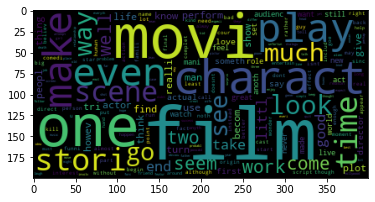

In [42]:
wordcloud = WordCloud()
text = docs.str.cat(sep=' ')
wordcloud.generate(text)
plt.imshow(wordcloud)

## Topic Analysis und Topic Mining

### KMeans

In [25]:
# Import der notwendigen Libraries
from sklearn.cluster import KMeans

In [31]:
# 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(docs)

In [37]:
# K-Means Clustering anwenden
# Anzahl Cluster festlegen
k = 2
# Clustering durchführen
km = KMeans(n_clusters=k)
km.fit(X)
# Cluster Labels extrahieren
labels = km.labels_
# Data Frame aus Dokumenten und Labels erstellen
words_and_labels = pd.DataFrame(list(zip(docs, labels)), columns=['Dokument', 'Cluster'])
# Erste 10 Zeilen des Data Frames anzeigen lassen
words_and_labels.head(n=10)

,Dokument,Cluster
0,film adapt comic book plenti success whether t...,1
1,everi movi come along suspect studio everi ind...,0
2,youv got mail work alot better deserv order ma...,1
3,jaw rare film grab attent show singl imag scre...,0
4,moviemak lot like gener manag nfl team postsal...,0
5,june 30 1960 selftaught idealist yet pragmat y...,0
6,appar director toni kay major battl new line r...,1
7,one colleagu surpris told will see betsi wed s...,0
8,bloodi clash independ lumumba refus pander bel...,0
9,american action film slowli drown death sea as...,1
